# 1. Load the data and generate descriptive statistics

In [1]:
%matplotlib inline 
from IPython.display import display, HTML
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os
import pandas as pd
import seaborn as sns
sns.set(style='ticks', rc={'axes.grid':True,
                           'xtick.labelsize': 'medium',
                           'ytick.labelsize': 'medium',
#                            'font.size': 15,
                          })
# mpl.rcParams.update({'font.size': 15})
# plt.rc('ytick', labelsize='small') 


# assume the notebook is in the right place and set up the plot path
analysis_dir = _dh[0]
assert analysis_dir.endswith(os.path.join('em-2020','analysis'))
plot_dir = os.path.realpath(os.path.join(analysis_dir, '..', 'tex', 'plots'))
data_dir = os.path.realpath(os.path.join(analysis_dir, '..', 'data'))

In [2]:
SAVE = True

def save_table(table, file, **kwargs):
    if SAVE:
        path = os.path.join(plot_dir, file)
        with open(path, 'w') as fd:
            fd.write(table.to_latex(**kwargs))
        
def save_fig(file, **kwargs):
    if SAVE:
        path = os.path.join(plot_dir, file)
        plt.savefig(path, metadata={'CreationDate': None})
        
def load_data(country, version='current'):
    data_file = os.path.join(data_dir, 'WB_{}_{}.csv'.format(country, version))
    data_raw = pd.read_csv(data_file, index_col='year')
    cols = ['ISG', 'TO', 'TI', 'P_GDP', 'P_GDPb', 'EI', 'EIb']
    if 'EIc' in data_raw:
        cols.append('EIc')
    return data_raw[cols]

def summary_stats(data, country, version):
    stats = ref_data.describe().T[['min', 'max', 'mean', 'std', 'count']]
    stats['count'] = stats['count'].astype(int)
    with pd.option_context('display.float_format', '{:.2f}'.format):
        display(stats)
        print(stats.to_latex())
#         save_table(stats, '_'.join((country, version, 'descriptive_statistics.tex')))

In [3]:
REF_COUNTRY = 'BGD'
REF_VERSION = '201805'
ref_data_raw = load_data(REF_COUNTRY, REF_VERSION)
ref_data = ref_data_raw.loc[1986:2015, ['ISG', 'TO', 'TI', 'P_GDP', 'EI']]

In [4]:
summary_stats(ref_data, REF_COUNTRY, REF_VERSION)

,min,max,mean,std,count
ISG,20.05,28.15,24.07,2.28,30
TO,16.69,48.11,30.56,9.98,30
TI,93.00,354.00,239.20,93.50,30
P_GDP,227.42,1210.16,498.83,261.51,30
EI,0.20,0.49,0.35,0.07,29


\begin{tabular}{lrrrrr}
\toprule
{} &    min &     max &   mean &    std &  count \\
\midrule
ISG   &  20.05 &   28.15 &  24.07 &   2.28 &     30 \\
TO    &  16.69 &   48.11 &  30.56 &   9.98 &     30 \\
TI    &  93.00 &  354.00 & 239.20 &  93.50 &     30 \\
P\_GDP & 227.42 & 1210.16 & 498.83 & 261.51 &     30 \\
EI    &   0.20 &    0.49 &   0.35 &   0.07 &     29 \\
\bottomrule
\end{tabular}



In [5]:
def plot_corr(data, figsize=None, **kwargs):
    corr = data.corr(lambda x, y: scipy.stats.pearsonr(x,y)[0])
    significance = data.corr(lambda x, y: scipy.stats.pearsonr(x,y)[1])
    corr_text = corr.applymap('{:.3f}'.format) + np.where(significance < .01, '*', '')

    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    if figsize is None:
        figsize=np.array([1, 0.75]) * corr.shape[0] + np.array([kwargs.get('cbar', True) * 1.5, 0])
    f, ax = plt.subplots(figsize=figsize)
    cmap = sns.diverging_palette(220, 10, s=50, l=85, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, annot=corr_text, fmt='', mask=mask, cmap=cmap, 
                square=False, linewidths=.25, **kwargs)
    ax.set_yticklabels(ax.get_yticklabels(), fontdict={'verticalalignment': 'center'})

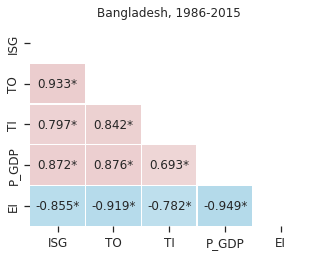

In [6]:
plot_corr(ref_data, cbar=False)
plt.title('Bangladesh, 1986-2015')
save_fig('_'.join((REF_COUNTRY, REF_VERSION, 'correlations.pdf')))

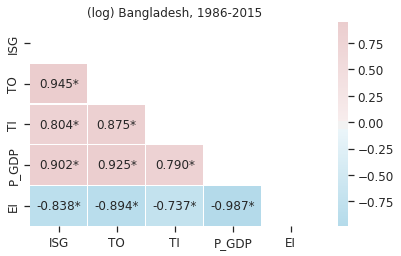

In [7]:
plot_corr(np.log(ref_data))
plt.title('(log) Bangladesh, 1986-2015')
save_fig('_'.join((REF_COUNTRY, REF_VERSION, 'correlations_log.pdf')))